In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn

In [6]:
line = np.linspace(-3, 3, 100)

Text(0, 0.5, 'relu(x), tanh(x)')

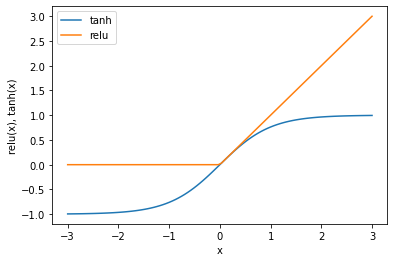

In [10]:
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [58]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10], max_iter=10000).fit(X_train, y_train)

Text(0, 0.5, 'feature 1')

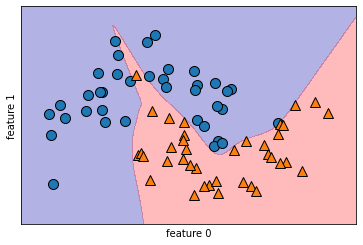

In [59]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

c:\users\aboud\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\aboud\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


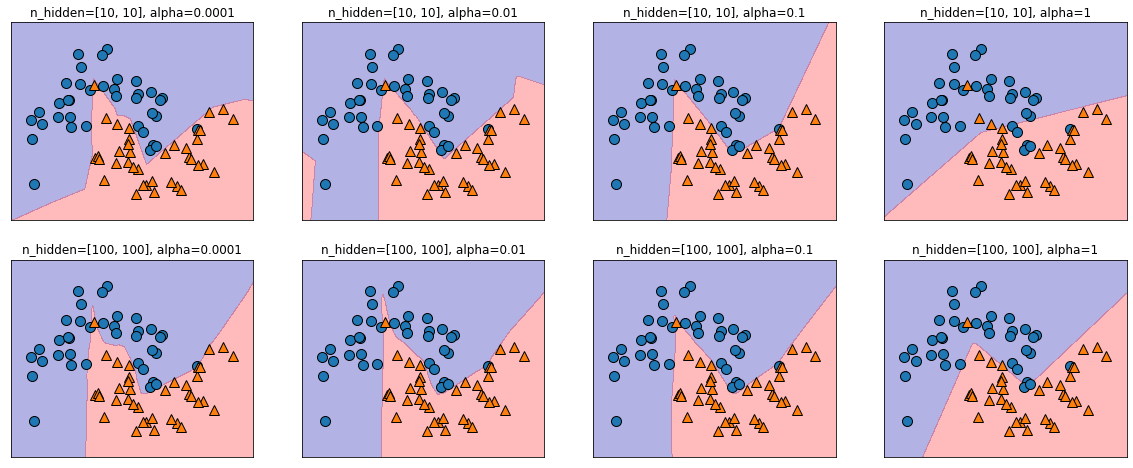

In [63]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, hl in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                           hidden_layer_sizes=[hl, hl], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title(f'n_hidden=[{hl}, {hl}], alpha={alpha}')

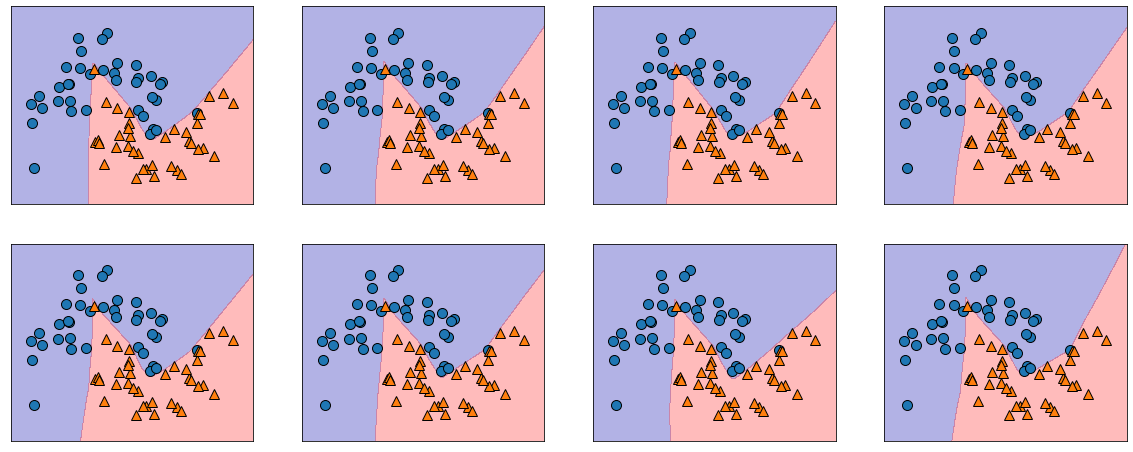

In [69]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(random_state=i, hidden_layer_sizes=[100, 100], max_iter=1000)
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [70]:
from sklearn.datasets import load_breast_cancer

In [71]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [72]:
print('maximum per feature:\n', cancer.data.max(axis=0))

maximum per feature:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [73]:
mlp = MLPClassifier(random_state=42).fit(X_train, y_train)

train set accuracy:  0.9389671361502347
test set accuracy:  0.9230769230769231


In [76]:
mean_train = X_train.mean(axis=0)
std_train = X_train.std(axis=0)

array([3.60913084e+00, 4.37039753e+00, 2.49035108e+01, 3.63298829e+02,
       1.39355324e-02, 5.27830156e-02, 7.81274028e-02, 3.94339706e-02,
       2.70417058e-02, 7.00154093e-03, 2.81953611e-01, 5.40703280e-01,
       2.08103335e+00, 4.74768880e+01, 3.13109911e-03, 1.70964027e-02,
       2.63168020e-02, 6.08127674e-03, 8.29465140e-03, 2.30318806e-03,
       4.87743176e+00, 6.18375033e+00, 3.39173638e+01, 5.76652169e+02,
       2.27747616e-02, 1.55309337e-01, 2.04609032e-01, 6.68693533e-02,
       5.97641980e-02, 1.77256982e-02])

In [77]:
X_train_scaled = (X_train - mean_train) / std_train
X_test_scaled = (X_test - mean_train) / std_train

In [96]:
mlp = MLPClassifier(alpha=1, max_iter=1000, random_state=0).fit(X_train_scaled, y_train)

In [97]:
print('train set accuracy: ', mlp.score(X_train_scaled, y_train))
print('test set accuracy: ', mlp.score(X_test_scaled, y_test))

train set accuracy:  0.9906103286384976
test set accuracy:  0.965034965034965


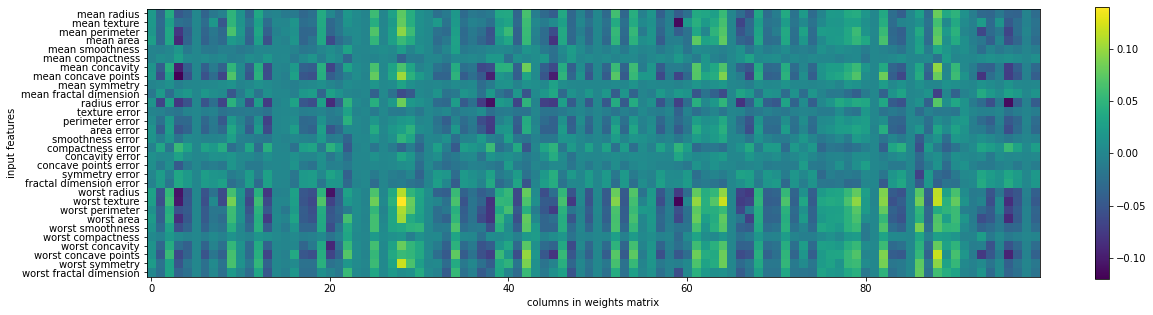

In [99]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('columns in weights matrix')
plt.ylabel('input features')
plt.colorbar()